In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.stem.snowball import SnowballStemmer

In [21]:
cols = ['polarity','id','date','query','username','text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=cols)

In [22]:
df.describe()

,polarity,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [23]:
df.head()

,polarity,id,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [28]:
df['negative'] = np.where(df['polarity'] == 0, 1, 0)
df['neutral'] = np.where(df['polarity'] == 2, 1, 0)
df['positive'] = np.where(df['polarity'] == 4, 1, 0)

In [30]:
df.head()

,polarity,id,date,query,username,text,negative,neutral,positive
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,0,0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,1,0,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,1,0,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,1,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",1,0,0


In [31]:
new_df = df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1)
new_df.head()

,text,negative,neutral,positive
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,0,0
1,is upset that he can't update his Facebook by ...,1,0,0
2,@Kenichan I dived many times for the ball. Man...,1,0,0
3,my whole body feels itchy and like its on fire,1,0,0
4,"@nationwideclass no, it's not behaving at all....",1,0,0


In [34]:
new_df.to_csv("text_fixed.csv", sep=',', encoding='latin-1')

Wall time: 21 s


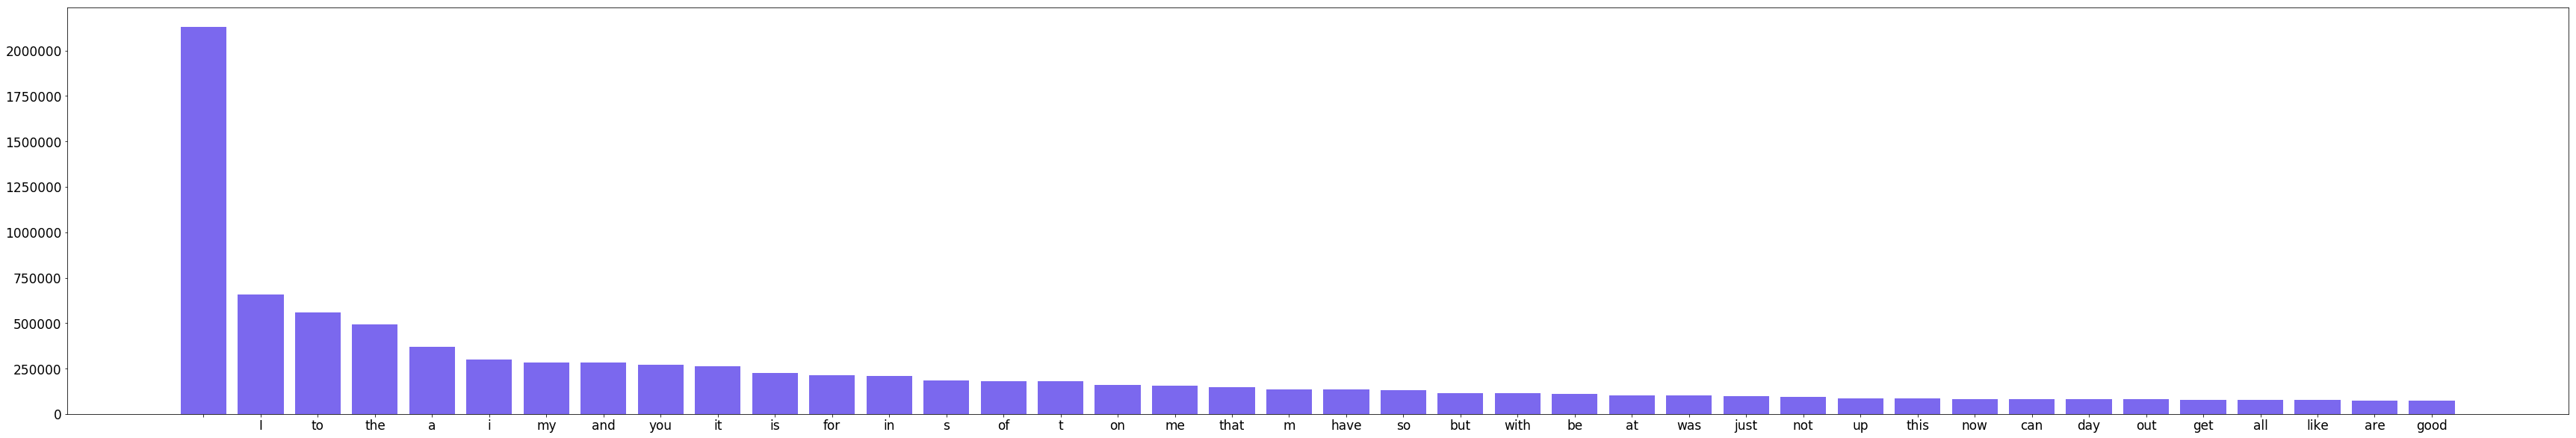

In [41]:
%%time

words = dict()
for text in df['text']:
    for word in re.split("\W+", text):
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

_, ax = plt.subplots(figsize=(60,10))
ax.bar(sorted(words, key=words.get, reverse=True)[:40], sorted(words.values(), reverse = True)[0:40], color = '#7B68EE', align = 'center')
ax.tick_params(axis='both', which='major', labelsize=17)

In [50]:
stemmer = SnowballStemmer("english")
stopwords_tmp=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "would", "should", "now"]
stopwords = []
for el in stopwords_tmp:
    stopwords.append(stemmer.stem(el))
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'our',
 'ourselv',
 'you',
 'your',
 'your',
 'yourself',
 'yourselv',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'her',
 'herself',
 'it',
 'it',
 'itself',
 'they',
 'them',
 'their',
 'their',
 'themselv',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'be',
 'have',
 'has',
 'had',
 'have',
 'do',
 'doe',
 'did',
 'do',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'becaus',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'dure',
 'befor',
 'after',
 'abov',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'onc',
 'here',
 'there',
 'when',
 'where',
 'whi',
 'how',
 'all',
 'ani',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'onli',
 'own',
 's

Wall time: 5min 42s


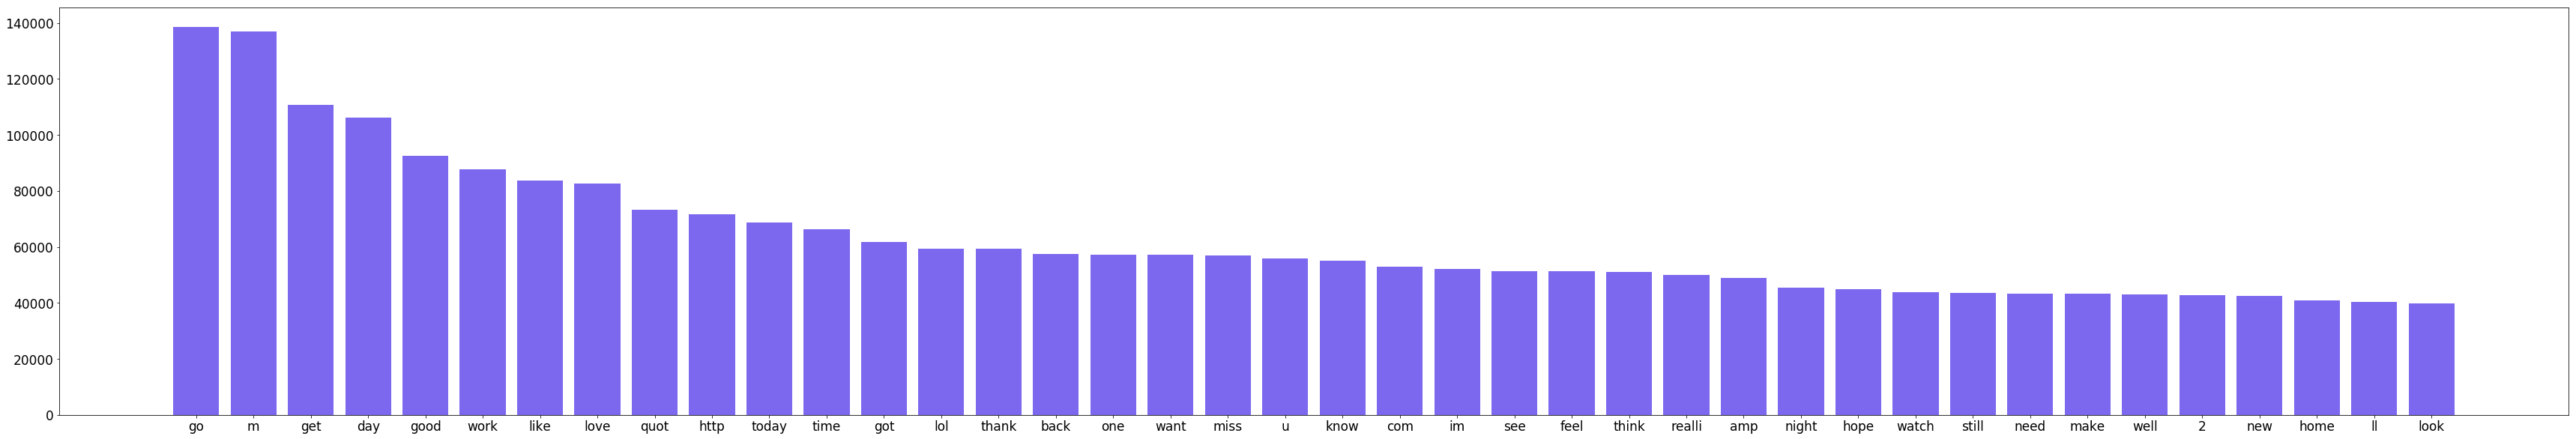

In [51]:
%%time

words = dict()
for text in df['text']:
    for word in re.split("\W+", text):
        word = stemmer.stem(word)
        if word != "" and word not in stopwords and word[0] != '@':
            if word in words:
                words[word] += 1
            else:
                words[word] = 1

_, ax = plt.subplots(figsize=(60,10))
ax.bar(sorted(words, key=words.get, reverse=True)[:40], sorted(words.values(), reverse = True)[0:40], color = '#7B68EE', align = 'center')
ax.tick_params(axis='both', which='major', labelsize=17)

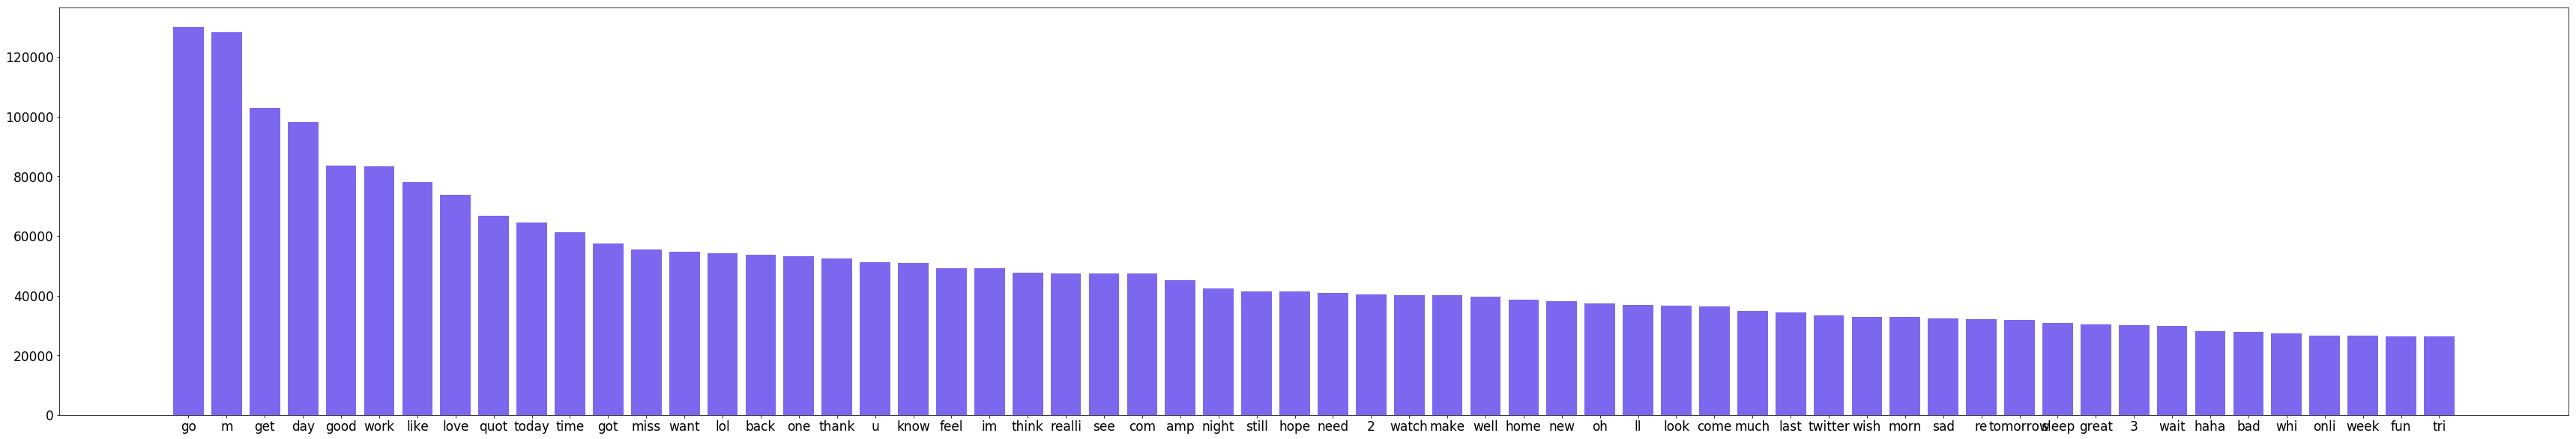

In [54]:
_, ax = plt.subplots(figsize=(60,10))
ax.bar(sorted(words, key=words.get, reverse=True)[:60], sorted(words.values(), reverse = True)[0:60], color = '#7B68EE', align = 'center')
ax.tick_params(axis='both', which='major', labelsize=17)

In [3]:
words
        

NameError: name 'words' is not defined